# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os
import chart_studio.plotly
#from plotly import plotly
import plotly.offline as offline
#import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
#Sample data of 50000 is taken from train_data.csv to avoid memory error
project_data_df = pd.read_csv('train_data.csv')
project_data_sort=project_data_df.sort_values(by=['id'])
project_data = project_data_sort.head(50000)

resource_data = pd.read_csv('resources.csv')

# Reading Data For Agglomerative and DBscan Clustering

In [9]:
#Sample data of 50000 is taken from train_data.csv to avoid memory error
project_data_df = pd.read_csv('train_data.csv')
project_data_sort=project_data_df.sort_values(by=['id'])
project_data = project_data_sort.head(25000)

resource_data = pd.read_csv('resources.csv')

In [6]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (50000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [7]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [10]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [11]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [12]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [11]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
25693       34858  p000002  638363148ff34bcbe004fcaeb7c9a544           Mrs.   
47025       89122  p000003  c8e40d76c14dbc404075f9013d5cd166           Mrs.   

      school_state project_submitted_datetime project_grade_category  \
25693           HI        2016-09-20 21:19:53             Grades 6-8   
47025           NY        2016-06-23 09:21:59          Grades PreK-2   

                                project_title  \
25693  21st Century Learners Across the Ocean   
47025     Kindergarten Loves Literacy Centers   

                                         project_essay_1  \
25693  Our native Hawaiian students of the valley hai...   
47025  My students are excited for their first year i...   

                                         project_essay_2 project_essay_3  \
25693  We like to combine 21st century learning with ...             NaN   
47025  Our students love literacy centers! Every morn...             NaN   

      project_essay_4                           project_resource_summary  \
25693             NaN  My students need headphones and supplemental s...   
47025             NaN  My students need phonemic awareness learning c...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
25693                                             1                    1   
47025                                             5                    1   

        clean_categories clean_subcategories  \
25693     History_Civics   History_Geography   
47025  Literacy_Language  Literature_Writing   

                                                   essay  
25693  Our native Hawaiian students of the valley hai...  
47025  My students are excited for their first year i...

In [12]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [13]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)


Our native Hawaiian students of the valley hail from a tight knit community.  Many are from low socioeconomic backgrounds. Yet they remain a proud people not inclined to ask for hand outs. They   are genuine souls who face trials and tribulations on a daily basis. \r\n\r\nOur students come from predominately low socio-economic backgrounds with over 80% of our students receiving free or reduced lunch.  We also have a population of students who are homeless. \r\n\r\nIn spite of their struggles they come to school with positive attitudes and a smile. They are genuine, caring, and always thankful. Many aspire to attend college and will work hard to make that happen.We like to combine 21st century learning with traditional learning.  This allows our students the time to acclimate to the changes and become active 21st century learners.  \r\n\r\nAs 21st century learners, the students require access to a variety of tools and technology. Use of technology serves to engage the students with vary

In [13]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [15]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

Art experiences are important in the elementary school classroom. I have seen, in the last several years, the majority of my student lack exposure to basic art techniques. Cutting, painting, even using glue properly is very awkward for them. \r\n\r\nI would like watercolor paint sets for my students. Watercolor sets provide beautiful options for expression in a format that allows for teaching about how to use the tools of an artist. \r\n\r\nI hope through providing tools for my students to create art it will enrich their appreciation and awareness of the beauties around us; those created by nature and by the human hand. \r\n\r\nArt expression is important for elementary aged children. Over the past several years my students have come to me lacking basic art skills such as cutting, painting, and gluing. Academics that are testable have overshadowed and all but wiped out the nontestable learning. Time children spend making and communicating through art has all but disappeared. \r\n\r\nI 

In [16]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

Art experiences are important in the elementary school classroom. I have seen, in the last several years, the majority of my student lack exposure to basic art techniques. Cutting, painting, even using glue properly is very awkward for them.     I would like watercolor paint sets for my students. Watercolor sets provide beautiful options for expression in a format that allows for teaching about how to use the tools of an artist.     I hope through providing tools for my students to create art it will enrich their appreciation and awareness of the beauties around us; those created by nature and by the human hand.     Art expression is important for elementary aged children. Over the past several years my students have come to me lacking basic art skills such as cutting, painting, and gluing. Academics that are testable have overshadowed and all but wiped out the nontestable learning. Time children spend making and communicating through art has all but disappeared.     I would like my st

In [17]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

Art experiences are important in the elementary school classroom I have seen in the last several years the majority of my student lack exposure to basic art techniques Cutting painting even using glue properly is very awkward for them I would like watercolor paint sets for my students Watercolor sets provide beautiful options for expression in a format that allows for teaching about how to use the tools of an artist I hope through providing tools for my students to create art it will enrich their appreciation and awareness of the beauties around us those created by nature and by the human hand Art expression is important for elementary aged children Over the past several years my students have come to me lacking basic art skills such as cutting painting and gluing Academics that are testable have overshadowed and all but wiped out the nontestable learning Time children spend making and communicating through art has all but disappeared I would like my students to have watercolor paint s

In [14]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [15]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 25000/25000 [00:24<00:00, 1027.62it/s]


In [17]:
# after preprocesing
preprocessed_essays[20000]

'art experiences important elementary school classroom i seen last several years majority student lack exposure basic art techniques cutting painting even using glue properly awkward i would like watercolor paint sets students watercolor sets provide beautiful options expression format allows teaching use tools artist i hope providing tools students create art enrich appreciation awareness beauties around us created nature human hand art expression important elementary aged children over past several years students come lacking basic art skills cutting painting gluing academics testable overshadowed wiped nontestable learning time children spend making communicating art disappeared i would like students watercolor paint sets by using watercolors children able learn gently hold paint brush apply paint varying degrees pressure color watercolors provide beautiful options teachable format i sure students would love illustrating also able learn brush painting techniques nannan'

In [16]:
np.savetxt("preprocessed_essaysKM25.csv", preprocessed_essays, fmt='%5s',delimiter=",")

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [17]:
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentence in tqdm(project_data['project_title'].values):
    title = decontracted(sentence)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    # https://gist.github.com/sebleier/554280
    title = ' '.join(e for e in title.split() if e not in stopwords)
    preprocessed_titles.append(title.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 25000/25000 [00:01<00:00, 17553.05it/s]


In [18]:
np.savetxt("preprocessed_titlesKM25.csv", preprocessed_titles, fmt='%5s',delimiter=",")

In [5]:
#project_data['clean_essays'] = pd.read_csv('preprocessed_essaysKM.csv')#load from preprocessed csv
#project_data['clean_titles'] = pd.read_csv('preprocessed_titlesKM.csv')# load from preprocessed csv

## 1.5 Preparing data for models

In [21]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [5]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (50000, 9)


In [6]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (50000, 30)


In [7]:
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace(" ","_")

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [0]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (109248, 16623)


In [0]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

#### 1.5.2.2 TFIDF vectorizer

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (109248, 16623)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [8]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [19]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:32<00:00, 3369.33it/s]


109248
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [03:36<00:00, 503.77it/s]


109248
300


In [0]:
# Similarly you can vectorize for title also

### 1.5.3 Vectorizing Numerical features

In [0]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

In [0]:
price_standardized

array([[0.00098843, 0.00191166, 0.00330448, ..., 0.00153418, 0.00046704,
        0.00070265]])

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [0]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(109248, 9)
(109248, 30)
(109248, 16623)
(109248, 1)


In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

(109248, 16663)

# Assignment 10: Clustering

- <font color='red'>step 1</font>: Choose any vectorizer (data matrix) that you have worked in any of the assignments, and got the best AUC value.
- <font color='red'>step 2</font>: Choose any of the <a href='https://scikit-learn.org/stable/modules/feature_selection.html'>feature selection</a>/<a href='https://scikit-learn.org/stable/modules/decomposition.html'>reduction algorithms</a> ex: selectkbest features, pretrained word vectors, model based feature selection etc and reduce the number of features to 5k features
- <font color='red'>step 3</font>: Apply all three kmeans, Agglomerative clustering, DBSCAN
    - <strong>K-Means Clustering:</strong> <br>
        ● Find the best ‘k’ using the elbow-knee method (plot k vs inertia_)<br>
    - <strong>Agglomerative Clustering: </strong><br>
        ● Apply <a href='https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/'>agglomerative algorithm</a> and try a different number of clusters like 2,5 etc. <br>
        ● You can take less data points (as this is very computationally expensive one) to perform hierarchical clustering because they do take a considerable amount of time to run. <br>
    - <strong>DBSCAN Clustering: </strong><br>
        ● Find the best ‘eps’ using the <a href='https://stackoverflow.com/a/48558030/4084039'>elbow-knee method</a>.<br>
        ● You can take a smaller sample size for this as well.
- <font color='red'>step 4</font>: Summarize each cluster by manually observing few points from each cluster.
- <font color='red'>step 5</font>: You need to plot the word cloud with essay text for each cluster for each of algorithms mentioned in <font color='red'>step 3</font>.

<h1>KMeans </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [23]:
#project_data['clean_essays'] = pd.read_csv('preprocessed_essaysDT.csv')#load from preprocessed csv
#project_data['clean_titles'] = pd.read_csv('preprocessed_titlesDT.csv')# load from preprocessed csv
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')
y = project_data['project_is_approved'].values
project_data.drop(['project_essay_1'], axis=1, inplace=True)
project_data.drop(['project_essay_2'], axis=1, inplace=True)
project_data.drop(['project_essay_3'], axis=1, inplace=True)
project_data.drop(['project_essay_4'], axis=1, inplace=True)
project_data.drop(['project_is_approved'], axis=1, inplace=True)
X = project_data

# train test split
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [39]:
print(X.shape)


(50000, 19)


# 2.2 Make Data Model Ready: encoding numerical, categorical features

ONE HOT ENCODING-CATEGORIES

In [24]:
# we use count vectorizer to convert the categories values of train , test and CV values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer1 = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False,
binary=True)
vectorizer1.fit(X['clean_categories'].values)
print(vectorizer1.get_feature_names())
categories_one_hot_train = vectorizer1.transform(X['clean_categories'].values)
#categories_one_hot_test = vectorizer1.transform(X_test['clean_categories'].values)
print("Shape of matrix after one hot encoding train ",categories_one_hot_train.shape)
#print("Shape of matrix after one hot encoding test",categories_one_hot_test.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encoding train  (25000, 9)


ONE HOT ENCODING-SUB CATEGORIES

In [25]:
# we use count vectorizer to convert the subcategories values of train, test and cv into one hot encoded features
vectorizer2 = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary
=True)
vectorizer2.fit(X['clean_subcategories'].values)
#print(vectorizer2.get_feature_names())
sub_categories_one_hot_train = vectorizer2.transform(X['clean_subcategories'].values)
#sub_categories_one_hot_test = vectorizer2.transform(X_test['clean_subcategories'].values)
print("Shape of matrix after one hot encoding train ",sub_categories_one_hot_train.shape)
#print("Shape of matrix after one hot encoding test",sub_categories_one_hot_test.shape)

Shape of matrix after one hot encoding train  (25000, 30)


ONE HOT ENCODING-SCHOOL STATE

In [26]:
# we use count vectorizer to convert the School State values of train, test and cv into one hot encoded features
vectorizer3= CountVectorizer(vocabulary=None, lowercase=False, binary=True)
vectorizer3.fit(X['school_state'].values)
#print(vectorizer3.get_feature_names())
state_one_hot_train = vectorizer3.transform(X['school_state'].values)
#state_one_hot_test = vectorizer3.transform(X_test['school_state'].values)
print("Shape of matrix after one hot encoding train ",state_one_hot_train.shape)
#print("Shape of matrix after one hot encoding test ",state_one_hot_test.shape)

Shape of matrix after one hot encoding train  (25000, 51)


ONE HOT ENCODING - TEACHER PREFIX

In [27]:
X['teacher_prefix']=X['teacher_prefix'].fillna(" ")

In [28]:
# we use count vectorizer to convert the teacher prefix values of train, test and cv into one hot encoded features
vectorizer4 = CountVectorizer(vocabulary=None, lowercase=False, binary=True)
vectorizer4.fit(X['teacher_prefix'].values.astype('U'))
print(vectorizer4.get_feature_names())
#prefix_one_hot = vectorizer4.transform(project_data[project_data.teacher_prefix.notnull()])
prefix_one_hot_train = vectorizer4.transform(X['teacher_prefix'].values.astype('U'))
#prefix_one_hot_test = vectorizer4.transform(X_test['teacher_prefix'].values.astype('U'))
#prefix_one_hot_cv = vectorizer4.transform(X_cv['teacher_prefix'].values.astype('U'))
print("Shape of matrix after one hot encoding train ",prefix_one_hot_train.shape)
#print("Shape of matrix after one hot encoding test ",prefix_one_hot_test.shape)

['Dr', 'Mr', 'Mrs', 'Ms', 'Teacher']
Shape of matrix after one hot encoding train  (25000, 5)


ONE HOT ENCODING - PROJECT GRADE CATEGORY

In [29]:
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace(" ","_")

In [30]:
# we use count vectorizer to convert the project grade category values of train, test and cv into one hot encoded features
#vectorizer5 = CountVectorizer(vocabulary=None, lowercase=False, binary=True)
my_counter = Counter()
for project_grade in project_data['project_grade_category'].values:
    my_counter.update(project_grade.split())
project_grade_cat_dict = dict(my_counter)
sorted_project_grade_cat_dict = dict(sorted(project_grade_cat_dict.items(), key=lambda kv: kv[1]))
vectorizer5 = CountVectorizer(vocabulary=list(sorted_project_grade_cat_dict.keys()), lowercase=False, binary=True)
#project_data_df[project_data_df.project_grade_category.notnull()]
vectorizer5.fit(X['project_grade_category'].values.astype('U'))
#print(vectorizer5.get_feature_names())
grade_cat_one_hot_train = vectorizer5.transform(X['project_grade_category'].values.astype('U'))
#grade_cat_one_hot_test = vectorizer5.transform(X_test['project_grade_category'].values.astype('U'))
print("Shape of matrix after one hot encoding train",grade_cat_one_hot_train.shape)
#print("Shape of matrix after one hot encoding test",grade_cat_one_hot_test.shape)

Shape of matrix after one hot encoding train (25000, 4)


<h2>Vectorizing Numerical Features</h2>

Vectorizing - Price

In [31]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikitlearn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# Suggestion provided by applied AI team to do normalization to avoid negative values
from sklearn.preprocessing import Normalizer
price_scalar = Normalizer()
price_scalar.fit(X['price'].values.reshape(-1,1)) 
# finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
price_standardized_train = price_scalar.transform(X['price'].values.reshape(-1, 1))
#price_standardized_test = price_scalar.transform(X_test['price'].values.reshape(-1, 1))
#price_standardized_cv = price_scalar.transform(X_cv['price'].values.reshape(-1, 1))
print("Shape of matrix after standardisation train",price_standardized_train.shape)
#print("Shape of matrix after standardisation test",price_standardized_test.shape)
#print("Shape of matrix after standardization cv",price_standardized_cv.shape)

Shape of matrix after standardisation train (25000, 1)


Vectorizing - Quantity

In [32]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikitlearn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import Normalizer
quantity_scalar = Normalizer()
quantity_scalar.fit(X['quantity'].values.reshape(-1,1)) 
quantity_standardized_train = quantity_scalar.transform(X['quantity'].values.reshape(-1, 1))
#quantity_standardized_test = quantity_scalar.transform(X_test['quantity'].values.reshape(-1, 1))
#quantity_standardized_cv = quantity_scalar.transform(X_cv['quantity'].values.reshape(-1, 1))
print("Shape of matrix after standardisation train",quantity_standardized_train.shape)
#print("Shape of matrix after standardisation test",quantity_standardized_test.shape)

Shape of matrix after standardisation train (25000, 1)


Vectorizing - teacher_number_of_previously_posted_projects

In [33]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikitlearn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import Normalizer
prev_proj_scalar = Normalizer()
prev_proj_scalar.fit(X['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) 
prev_proj_standardized_train = prev_proj_scalar.transform(X['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
#prev_proj_standardized_test = prev_proj_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
#prev_proj_standardized_cv = prev_proj_scalar.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
print("Shape of matrix after standardisation train",prev_proj_standardized_train.shape)
#print("Shape of matrix after standardisation test",prev_proj_standardized_test.shape)

Shape of matrix after standardisation train (25000, 1)


In [20]:
project_data['clean_titles']=preprocessed_titles
project_data['clean_essays']=preprocessed_essays

In [21]:
title_word_count = []
for a in project_data["clean_titles"].values.astype('U') :
    #fr=a.astype(str).str.split()
    #str=a.split()
    #print(fr)
    b = len(a.split())
    title_word_count.append(b)
project_data["title_word_count"] = title_word_count
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
25693       34858  p000002  638363148ff34bcbe004fcaeb7c9a544           Mrs.   
47025       89122  p000003  c8e40d76c14dbc404075f9013d5cd166           Mrs.   
39507      116274  p000004  bca138d8a12a49f54d9f53fc7dbebd81            Ms.   
89709      143268  p000006  75ef002fa4f10c298b6ef3dc67cff99d           Mrs.   
52956      126686  p000007  fd9e3870ebdcb6d760bc1c333273c852           Mrs.   

      school_state project_submitted_datetime project_grade_category  \
25693           HI        2016-09-20 21:19:53             Grades 6-8   
47025           NY        2016-06-23 09:21:59          Grades PreK-2   
39507           TX        2016-08-05 23:44:40             Grades 3-5   
89709           FL        2017-02-21 21:19:01          Grades PreK-2   
52956           UT        2016-09-01 23:46:58             Grades 3-5   

                                  project_title  \
25693    21st Century Learners Across the Ocean   
47025       Kindergarten Loves Literacy Centers   
39507                              Let's Read!!   
89709  Reading Success With Non-Fiction Readers   
52956            Technology to Shape Our Future   

                                         project_essay_1  \
25693  Our native Hawaiian students of the valley hai...   
47025  My students are excited for their first year i...   
39507  A classroom library is the center of learning ...   
89709  The kids in my class face many challenges in t...   
52956  “This is the best thing I’ve ever done in scho...   

                                         project_essay_2  ... project_essay_4  \
25693  We like to combine 21st century learning with ...  ...             NaN   
47025  Our students love literacy centers! Every morn...  ...             NaN   
39507  The donations to this project will make a diff...  ...             NaN   
89709  \r\n\r\nWorking in a rural title one school, t...  ...             NaN   
52956  The computers will provide a way for students ...  ...             NaN   

                                project_resource_summary  \
25693  My students need headphones and supplemental s...   
47025  My students need phonemic awareness learning c...   
39507  My students need a variety of literature in bo...   
89709  My students need non-fiction readers and stora...   
52956  My students need 6 HP Chromebook 11 G4 11.6 In...   

      teacher_number_of_previously_posted_projects  project_is_approved  \
25693                                            1                    1   
47025                                            5                    1   
39507                                            2                    1   
89709                                            5                    0   
52956                                            0                    1   

                     clean_categories                 clean_subcategories  \
25693                  History_Civics                   History_Geography   
47025               Literacy_Language                  Literature_Writing   
39507               Literacy_Language           ForeignLanguages Literacy   
89709               Literacy_Language                            Literacy   
52956  Math_Science Literacy_Language  AppliedSciences Literature_Writing   

                                                   essay  \
25693  Our native Hawaiian students of the valley hai...   
47025  My students are excited for their first year i...   
39507  A classroom library is the center of learning ...   
89709  The kids in my class face many challenges in t...   
52956  “This is the best thing I’ve ever done in scho...   

                                   clean_titles  \
25693        21st century learners across ocean   
47025       kindergarten loves literacy centers   
39507                                  let read   
89709  reading success with non fiction readers   
52956               technology shape our future   

 

In [22]:
essay_word_count = []
for a in project_data["clean_essays"].values.astype('U') :
    #fr=a.astype(str).str.split()
    #str=a.split()
    #print(fr)
    b = len(a.split())
    essay_word_count.append(b)
project_data["essay_word_count"] = essay_word_count
#project_data.head(5)

In [34]:
normalizer = Normalizer()

normalizer.fit(X['title_word_count'].values.reshape(1,-1))

title_word_count_train = normalizer.transform(X['title_word_count'].values.reshape(1,-1))
#title_word_count_cv = normalizer.transform(X_cv['title_word_count'].values.reshape(1,-1))
#title_word_count_test = normalizer.transform(X_test['title_word_count'].values.reshape(1,-1))

print("After vectorizations")
print(title_word_count_train.shape)
#print(title_word_count_cv.shape, y_cv.shape)
#print(title_word_count_test.shape, y_test.shape)
print("="*100)

#bow_feature_names.append('title_word_count')
#feature_names_tfidf.append('title_count')

After vectorizations
(1, 25000)


In [36]:

#title_word_count_test1=title_word_count_test.reshape(16500,1)
title_word_count_train1=title_word_count_train.reshape(25000,1)

In [37]:
normalizer = Normalizer()

normalizer.fit(X['essay_word_count'].values.reshape(1,-1))

essay_word_count_train = normalizer.transform(X['essay_word_count'].values.reshape(1,-1))

#essay_word_count_test = normalizer.transform(X_test['essay_word_count'].values.reshape(1,-1))

print("After vectorizations")
print(essay_word_count_train.shape)
#print(title_word_count_cv.shape, y_cv.shape)
#print(essay_word_count_test.shape, y_test.shape)
print("="*100)

#bow_feature_names.append('title_word_count')
#feature_names_tfidf.append('title_count')

After vectorizations
(1, 25000)


In [38]:
#essay_word_count_test1=essay_word_count_test.reshape(16500,1)
essay_word_count_train1=essay_word_count_train.reshape(25000,1)

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

BOW-Project Essays

In [39]:
#https://www.kaggle.com/shashank49/knn-on-donors-choose
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_bow_essay = CountVectorizer()
vectorizer_bow_essay.fit(X['clean_essays'].values.astype('U')) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer_bow_essay.transform(X['clean_essays'].values.astype('U'))
#X_test_essay_bow = vectorizer_bow_essay.transform(X_test['clean_essays'].values.astype('U'))

print("After vectorizations")
print(X_train_essay_bow.shape)
#print(X_test_essay_bow.shape, y_test.shape)

After vectorizations
(25000, 31810)


BOW-Project Titles

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_bow_titles = CountVectorizer()
vectorizer_bow_titles.fit(X['clean_titles'].values.astype('U')) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_titles_bow = vectorizer_bow_titles.transform(X['clean_titles'].values.astype('U'))
#X_test_titles_bow = vectorizer_bow_titles.transform(X_test['clean_titles'].values.astype('U'))

print("After vectorizations")
print(X_train_titles_bow.shape)
#print(X_test_titles_bow.shape, y_test.shape)

After vectorizations
(25000, 8452)


# [Task-1] Apply KMeans
# categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)

In [59]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((title_word_count_train1,essay_word_count_train1,categories_one_hot_train,sub_categories_one_hot_train,state_one_hot_train,prefix_one_hot_train,grade_cat_one_hot_train,price_standardized_train,quantity_standardized_train,prev_proj_standardized_train,X_train_essay_bow,X_train_titles_bow)).tocsr()
#X_te = hstack((title_word_count_test1,essay_word_count_test1,categories_one_hot_test,sub_categories_one_hot_test,state_one_hot_test,prefix_one_hot_test,grade_cat_one_hot_test,price_standardized_test,quantity_standardized_test,prev_proj_standardized_test,X_test_essay_bow,X_test_titles_bow)).tocsr()
#np.savetxt("X_tr.csv", X_tr, delimiter=",")
#np.savetxt("X_cr.csv", X_cr, delimiter=",")
#np.savetxt("X_te.csv", X_te, fmt='%5s',delimiter=",")
from scipy import sparse
#Save the sparse matrix to avoid memory error
sparse.save_npz("X_tr_KM.npz", X_tr)
#sparse.save_npz("X_te_KM.npz", X_te)
print("Final Data matrix")
print(X_tr.shape)
#print(X_te.shape, y_test.shape)

Final Data matrix
(50000, 53215)


In [61]:
from sklearn.feature_selection import SelectKBest,chi2,f_classif
X_best5000 = SelectKBest(f_classif,k=5000).fit_transform(X_tr,y)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning:

Features [0 0 0 0 0 0] are constant.



In [62]:
print(X_best5000.shape)

(50000, 5000)


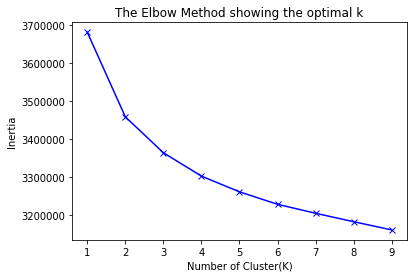

In [38]:
#https://pythonprogramminglanguage.com/kmeans-elbow-method/
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


# k means determine k
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_best5000)
    #kmeanModel.fit(X_best5000)
    inertia.append(kmeanModel.inertia_)
    

# Plot the elbow
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Cluster(K)')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

best k=2

In [64]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_best5000)
print("Labels in the cluster:{}".format(kmeans.labels_))

Labels in the cluster:[0 0 1 ... 0 1 1]


In [65]:

centroids = kmeans.cluster_centers_

In [67]:
print("Centroids:",centroids)

Centroids: [[4.22831124e-03 4.87506638e-03 1.12793114e-02 ... 4.94706639e-05
  0.00000000e+00 0.00000000e+00]
 [4.06551621e-03 3.96097682e-03 1.33619821e-02 ... 3.35728194e-05
  3.35728194e-05 3.35728194e-05]]


In [68]:
cluster1=[]
cluster2=[]
for i in range(X_best5000.shape[0]):
    if kmeans.labels_[i] == 0:
        cluster1.append(X.iloc[i])
    elif kmeans.labels_[i] == 1:
        cluster2.append(X.iloc[i])

In [90]:
print(len(cluster1))
print(len(cluster2))

20214
29786


In [92]:
print(cluster1[1])

Unnamed: 0                                                                                  89122
id                                                                                        p000003
teacher_id                                                       c8e40d76c14dbc404075f9013d5cd166
teacher_prefix                                                                               Mrs.
school_state                                                                                   NY
project_submitted_datetime                                                    2016-06-23 09:21:59
project_grade_category                                                              Grades_PreK-2
project_title                                                 Kindergarten Loves Literacy Centers
project_resource_summary                        My students need phonemic awareness learning c...
teacher_number_of_previously_posted_projects                                                    5
clean_categories    

In [98]:
print(cluster2[1])

Unnamed: 0                                                                                 143268
id                                                                                        p000006
teacher_id                                                       75ef002fa4f10c298b6ef3dc67cff99d
teacher_prefix                                                                               Mrs.
school_state                                                                                   FL
project_submitted_datetime                                                    2017-02-21 21:19:01
project_grade_category                                                              Grades_PreK-2
project_title                                            Reading Success With Non-Fiction Readers
project_resource_summary                        My students need non-fiction readers and stora...
teacher_number_of_previously_posted_projects                                                    5
clean_categories    

In [91]:
print(cluster1[1][15])

4


In [94]:
cluster1_essay=[]
cluster2_essay=[]
for i in range(len(cluster1)):
    cluster1_essay=cluster1[i][14]
for i in range(len(cluster2)):
    cluster2_essay=cluster2[i][14]

# WordCloud for cluster1 Essay

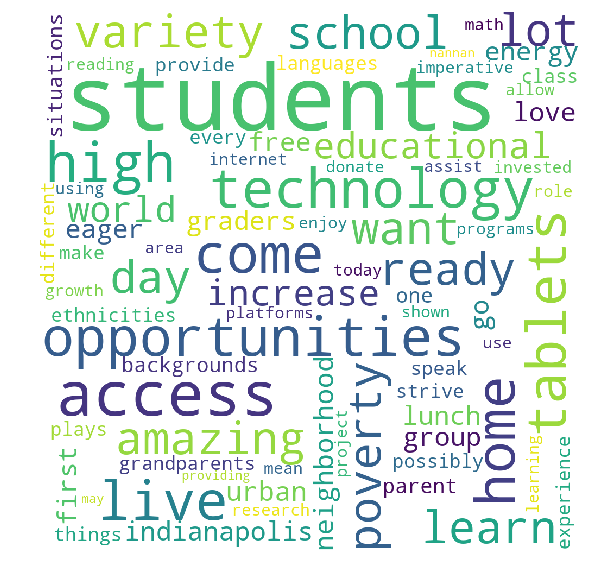

In [96]:
#https://github.com/philomath18/Decision-Tree---Donors-Choose
#tn, fp, fn, tp = confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)).ravel()

from wordcloud import WordCloud


wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white',  
                min_font_size = 5).generate(cluster1_essay) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# WordCloud for cluster2 Essay

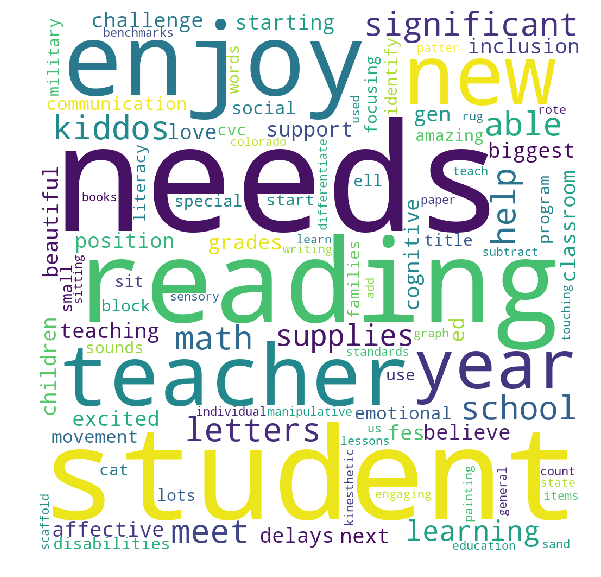

In [97]:
#https://github.com/philomath18/Decision-Tree---Donors-Choose
#tn, fp, fn, tp = confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)).ravel()

from wordcloud import WordCloud


wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white',  
                min_font_size = 5).generate(cluster2_essay) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# Apply Agglomerative Clustering

In [41]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((title_word_count_train1,essay_word_count_train1,categories_one_hot_train,sub_categories_one_hot_train,state_one_hot_train,prefix_one_hot_train,grade_cat_one_hot_train,price_standardized_train,quantity_standardized_train,prev_proj_standardized_train,X_train_essay_bow,X_train_titles_bow)).tocsr()
#X_te = hstack((title_word_count_test1,essay_word_count_test1,categories_one_hot_test,sub_categories_one_hot_test,state_one_hot_test,prefix_one_hot_test,grade_cat_one_hot_test,price_standardized_test,quantity_standardized_test,prev_proj_standardized_test,X_test_essay_bow,X_test_titles_bow)).tocsr()
#np.savetxt("X_tr.csv", X_tr, delimiter=",")
#np.savetxt("X_cr.csv", X_cr, delimiter=",")
#np.savetxt("X_te.csv", X_te, fmt='%5s',delimiter=",")
from scipy import sparse
#Save the sparse matrix to avoid memory error
sparse.save_npz("X_tr_KMset2.npz", X_tr)
#sparse.save_npz("X_te_KM.npz", X_te)
print("Final Data matrix")
print(X_tr.shape)
#print(X_te.shape, y_test.shape)

Final Data matrix
(25000, 40366)


In [42]:
from sklearn.feature_selection import SelectKBest,chi2,f_classif
X_best5000 = SelectKBest(f_classif,k=5000).fit_transform(X_tr,y)

print(X_best5000.shape)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning:

Features [0 0 0 0 0 0] are constant.



(25000, 5000)


In [44]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
k=2

AgglomerativeModel = AgglomerativeClustering(n_clusters=2)
AgglomerativeModel.fit(X_best5000.toarray())
print("Labels in the cluster:{}".format(AgglomerativeModel.labels_))

Labels in the cluster:[1 1 0 ... 0 0 0]


In [48]:
cluster1=[]
cluster2=[]
for i in range(X_best5000.shape[0]):
    if AgglomerativeModel.labels_[i] == 0:
        cluster1.append(X.iloc[i])
    elif AgglomerativeModel.labels_[i] == 1:
        cluster2.append(X.iloc[i])

print(len(cluster1))
print(len(cluster2))

18539
6461


In [49]:
print(cluster1[1])

Unnamed: 0                                                                                 143268
id                                                                                        p000006
teacher_id                                                       75ef002fa4f10c298b6ef3dc67cff99d
teacher_prefix                                                                               Mrs.
school_state                                                                                   FL
project_submitted_datetime                                                    2017-02-21 21:19:01
project_grade_category                                                              Grades_PreK-2
project_title                                            Reading Success With Non-Fiction Readers
project_resource_summary                        My students need non-fiction readers and stora...
teacher_number_of_previously_posted_projects                                                    5
clean_categories    

In [50]:
print(cluster2[1])

Unnamed: 0                                                                                  89122
id                                                                                        p000003
teacher_id                                                       c8e40d76c14dbc404075f9013d5cd166
teacher_prefix                                                                               Mrs.
school_state                                                                                   NY
project_submitted_datetime                                                    2016-06-23 09:21:59
project_grade_category                                                              Grades_PreK-2
project_title                                                 Kindergarten Loves Literacy Centers
project_resource_summary                        My students need phonemic awareness learning c...
teacher_number_of_previously_posted_projects                                                    5
clean_categories    

In [52]:
print(cluster1[1][14])

the kids class face many challenges young lives we title 1 school relatively unknown city families stay generations many students come school hungry come broken homes come school glad let clean sink it pleasure show i my kids funny affectionate interesting love laugh it goal make classroom interesting inviting kids working rural title one school conversations arise every year student back ground knowledge looking kids year i noticed flock library center room i constantly changing adding books i think kids enjoy based interests however library lacking non fiction books could benefit kids greatly non fiction readers help kids gain much needed background knowledge carry school carriers as dr seuss says the more read more things know more learn more places go dr seuss nannan


In [53]:
cluster1_essay=[]
cluster2_essay=[]
for i in range(len(cluster1)):
    cluster1_essay=cluster1[i][14]
for i in range(len(cluster2)):
    cluster2_essay=cluster2[i][14]

# WordCloud for cluster1 Essay

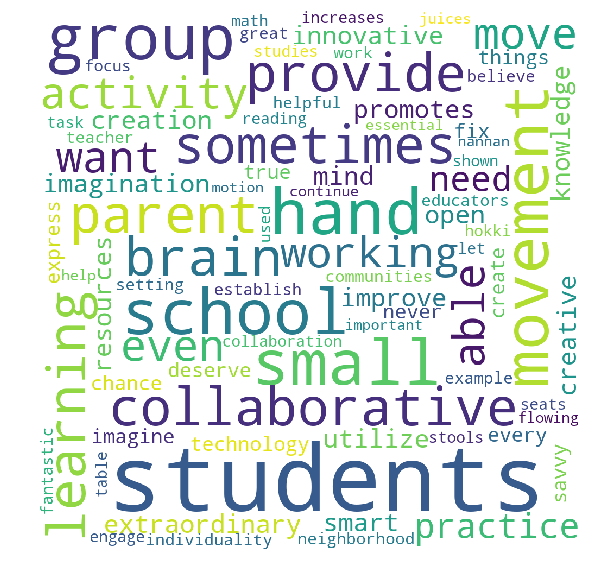

In [54]:
#https://github.com/philomath18/Decision-Tree---Donors-Choose
#tn, fp, fn, tp = confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)).ravel()

from wordcloud import WordCloud


wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white',  
                min_font_size = 5).generate(cluster1_essay) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# WordCloud for cluster2 Essay

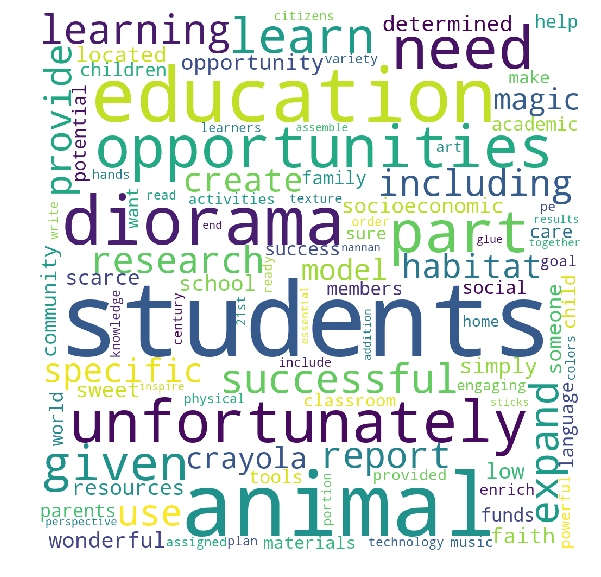

In [55]:
#https://github.com/philomath18/Decision-Tree---Donors-Choose
#tn, fp, fn, tp = confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)).ravel()

from wordcloud import WordCloud


wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white',  
                min_font_size = 5).generate(cluster2_essay) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# Apply DBSCAN

In [62]:
#https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
from sklearn import neighbors
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(X_best5000)
distances, indices = nbrs.kneighbors(X_best5000)

Text(0.5, 1.0, 'Distances and Points Graph Plot')

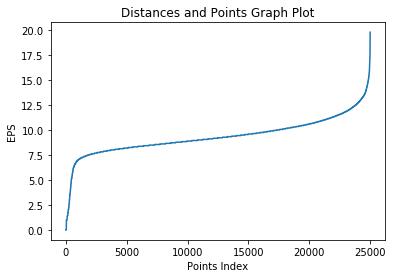

In [63]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel('Points Index')
plt.ylabel('EPS')
plt.title('Distances and Points Graph Plot')

In [64]:
from sklearn.cluster import DBSCAN 
eps=12.5
dbscanmodel = DBSCAN(eps=eps,min_samples=10) 
dbscanmodel.fit(X_best5000.toarray())


Labels in the cluster:[1 1 0 ... 0 0 0]


In [66]:
print("Labels in the cluster:{}".format(dbscanmodel.labels_))
labels=dbscanmodel.labels_

Labels in the cluster:[0 0 0 ... 0 0 0]


In [68]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_best5000, labels))

Estimated number of clusters: 1
Estimated number of noise points: 1264
Silhouette Coefficient: 0.242


In [ ]:
for i in range(X_tr.shape[0]):
    if model.labels_[i] == 1:
        clusters_1.append(project_data_new.iloc[i])

In [75]:
dbscan_cluster1=[]
noise_cluster=[]
for i in range(X_best5000.shape[0]):
    if labels[i] == 0:
        dbscan_cluster1.append(X.iloc[i])
    elif labels[i] == -1:
        noise_cluster.append(X.iloc[i])
    

print(len(dbscan_cluster1))
print(len(noise_cluster))


23736
1264


In [73]:
print(dbscan_cluster1[0])

Unnamed: 0                                                                                  34858
id                                                                                        p000002
teacher_id                                                       638363148ff34bcbe004fcaeb7c9a544
teacher_prefix                                                                               Mrs.
school_state                                                                                   HI
project_submitted_datetime                                                    2016-09-20 21:19:53
project_grade_category                                                                 Grades_6-8
project_title                                              21st Century Learners Across the Ocean
project_resource_summary                        My students need headphones and supplemental s...
teacher_number_of_previously_posted_projects                                                    1
clean_categories    

In [79]:
print(dbscan_cluster1[1][14])

my students excited first year kindergarten not eager learn we ict class general special education students well english language learner ell students our kindergarten classroom filled many different faces our school title one low income school many students come school smiles faces wanting know learning next many never went school written letters alphabet our students love literacy centers every morning morning announcements even start class asking go centers this favorite part day the centers great independent partner practice applying skills working we need centers focus phonemic awareness phonics sight words these centers need engaging structured ensure students learning become effective readers my students need new reading centers keep students interested active engaged fun learning environment i working small groups these centers educational fun beneficial meeting students needs centers fun students however provide much support practice skills the centers great independent partne

In [80]:
print(noise_cluster[1][14])

every morning starts we responsible respectful ready to learn my active first graders labeled add adhd varying learning disabilities emotional speech delays however hard working always eager willing take risks my students benefit flexible seating options allow release energy learn first graders ask move need every morning exercises implement sensory breaks flexible seating options instruction independent work time extremely beneficial i use strategies i believe important incorporate least 60 minutes physcial activity school day our classroom small community move around order work together flexible seating allows sit together floor tables order work collaboratively no one ever feels confinded single space love my students asking 6 hokki stools add awesome classroom community during reading writing math workshops students share crate seats lean pillows floor stand high top table addition regular school chairs last year generous parent donation received 2 hokki stools my students love usi

In [76]:
core_essay=[]
noisy_essay=[]
for i in range(len(dbscan_cluster1)):
    core_essay=dbscan_cluster1[i][14]
for i in range(len(noise_cluster)):
    noisy_essay=noise_cluster[i][14]

# Wordcloud For Core Essay Points

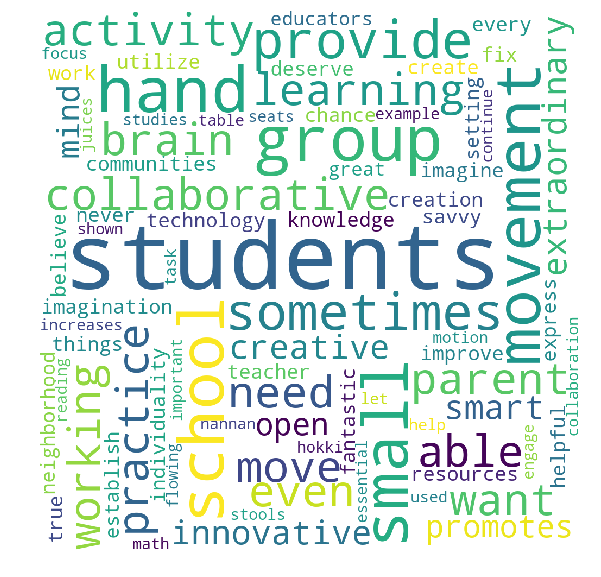

In [82]:
#https://github.com/philomath18/Decision-Tree---Donors-Choose
#tn, fp, fn, tp = confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)).ravel()

from wordcloud import WordCloud


wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white',  
                min_font_size = 5).generate(core_essay) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# WordCloud For Noise Essay Points

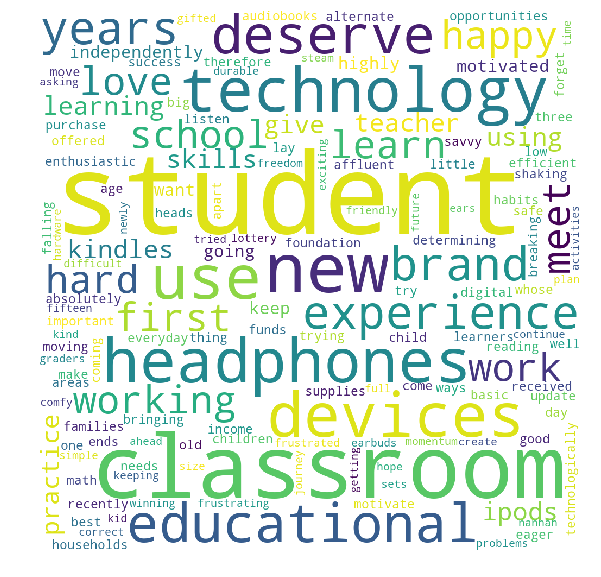

In [83]:
#https://github.com/philomath18/Decision-Tree---Donors-Choose
#tn, fp, fn, tp = confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)).ravel()

from wordcloud import WordCloud


wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white',  
                min_font_size = 5).generate(noisy_essay) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [85]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable 
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable 
x=PrettyTable() 
x.field_names=["Vectorizer","Model","Cluster Count"] 
x.add_row(["BOW","KMeans",2]) 
x.add_row(["BOW","Agglomerative Clustering",2]) 
x.add_row(["BOW","DBSCAN ",1]) 
print(x)

+------------+--------------------------+---------------+
| Vectorizer |          Model           | Cluster Count |
+------------+--------------------------+---------------+
|    BOW     |          KMeans          |       2       |
|    BOW     | Agglomerative Clustering |       2       |
|    BOW     |         DBSCAN           |       1       |
+------------+--------------------------+---------------+


# Observations

# Taken 50k points to for KMeans
#  Taken 25k
# None of the model gave high accuracy
# Some cases accuracy in test data is higher than train data
# Our model with 5k features could not increase accuracy
# Due to less training data consideration,  models are not performing accurately.